In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# links from Eric:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 Allstate.ipynb  'claims_data (1).csv'


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/claims_data (1).csv')


In [ ]:
df.shape
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9  ...     cont6     cont7  \
0   1    A    B    A    B    A    A    A    A    B  ...  0.718367  0.335060   
1   2    A    B    A    A    A    A    A    A    B  ...  0.438917  0.436585   
2   5    A    B    A    A    B    A    A    A    B  ...  0.289648  0.315545   
3  10    B    B    A    B    A    A    A    A    B  ...  0.440945  0.391128   
4  11    A    B    A    B    A    A    A    A    B  ...  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14     loss  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  2213.18  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  1283.60  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  3005.09  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642   939.85  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  2763.85  

[5 rows x 132 columns]

In [ ]:
# Missing Values
df.isnull().sum()

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64

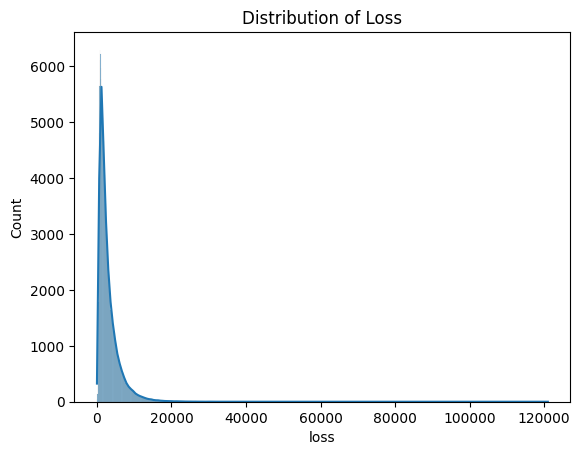

In [ ]:
# Target Variable {loss}
sns.histplot(df['loss'], kde=True)
plt.title('Distribution of Loss')
plt.show()

In [ ]:
df.describe().T

count           mean            std       min            25%  \
id      188318.0  294135.982561  169336.084867  1.000000  147748.250000   
cont1   188318.0       0.493861       0.187640  0.000016       0.346090   
cont2   188318.0       0.507188       0.207202  0.001149       0.358319   
cont3   188318.0       0.498918       0.202105  0.002634       0.336963   
cont4   188318.0       0.491812       0.211292  0.176921       0.327354   
cont5   188318.0       0.487428       0.209027  0.281143       0.281143   
cont6   188318.0       0.490945       0.205273  0.012683       0.336105   
cont7   188318.0       0.484970       0.178450  0.069503       0.350175   
cont8   188318.0       0.486437       0.199370  0.236880       0.312800   
cont9   188318.0       0.485506       0.181660  0.000080       0.358970   
cont10  188318.0       0.498066       0.185877  0.000000       0.364580   
cont11  188318.0       0.493511       0.209737  0.035321       0.310961   
cont12  188318.0       0.493150       0.209427  0.036232       0.311661   
cont13  188318.0       0.493138       0.212777  0.000228       0.315758   
cont14  188318.0       0.495717       0.222488  0.179722       0.294610   
loss    188318.0    3037.337686    2904.086186  0.670000    1204.460000   

                  50%            75%            max  
id      294539.500000  440680.500000  587633.000000  
cont1        0.475784       0.623912       0.984975  
cont2        0.555782       0.681761       0.862654  
cont3        0.527991       0.634224       0.944251  
cont4        0.452887       0.652072       0.954297  
cont5        0.422268       0.643315       0.983674  
cont6        0.440945       0.655021       0.997162  
cont7        0.438285       0.591045       1.000000  
cont8        0.441060       0.623580       0.980200  
cont9        0.441450       0.566820       0.995400  
cont10       0.461190       0.614590       0.994980  
cont11       0.457203       0.678924       0.998742  
cont12       0.462286       0.675759       0.998484  
cont13       0.363547       0.689974       0.988494  
cont14       0.407403       0.724623       0.844848  
loss      2115.570000    3864.045000  121012.250000

In [ ]:
# Data type
df.dtypes.value_counts()

object     116
float64     15
int64        1
Name: count, dtype: int64

In [ ]:
# Cat Features
cat_cols = [col for col in df.columns if 'cat' in col]
df[cat_cols].nunique().sort_values()


cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat109     84
cat110    131
cat116    326
Length: 116, dtype: int64

In [ ]:
# My task 96:115

my_features = df.columns[96:115]
print(my_features)


Index(['cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102',
       'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109',
       'cat110', 'cat111', 'cat112', 'cat113', 'cat114'],
      dtype='object')


In [ ]:
df.columns.tolist()

['id',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 

In [ ]:
num_features = [col for col in my_features if 'cont' in col or df[col].dtype in ['float64', 'int64']]
cat_features = [col for col in my_features if 'cat' in col or df[col].dtype == 'object']

print("Numeric:", num_features)
print("Categorical:", cat_features)

Numeric: []
Categorical: ['cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114']


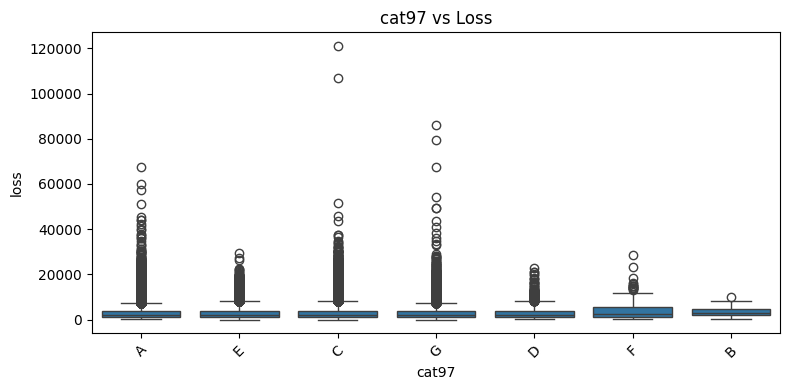

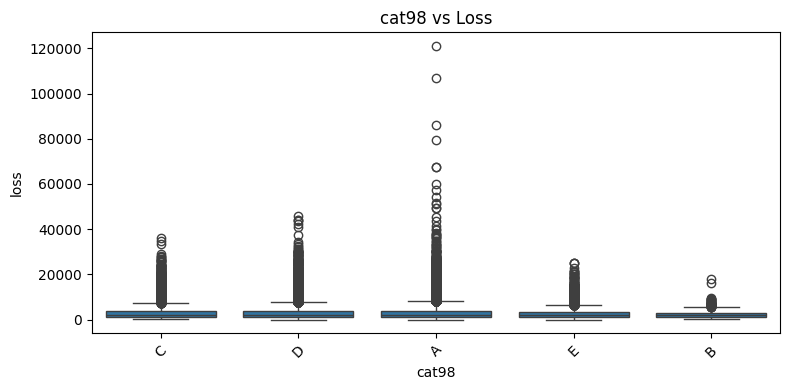

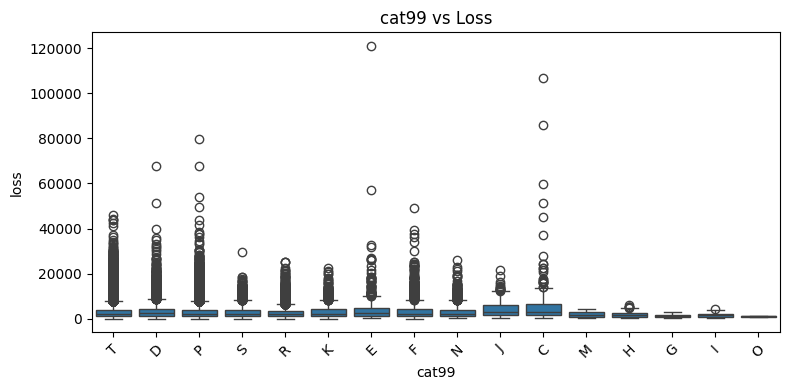

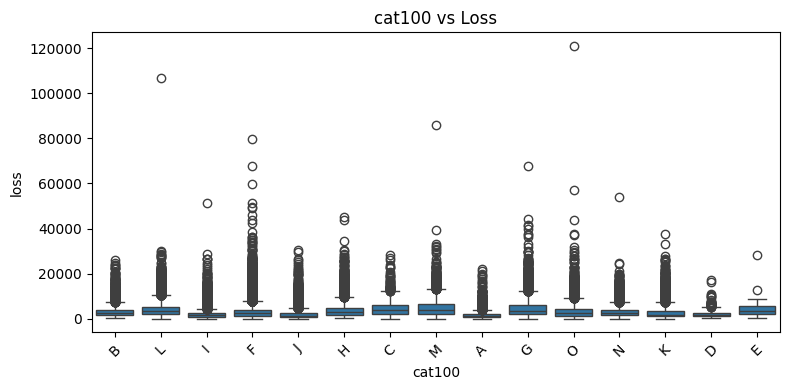

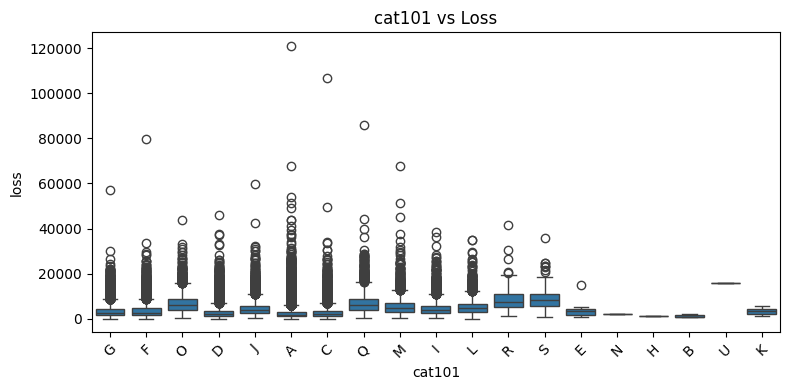

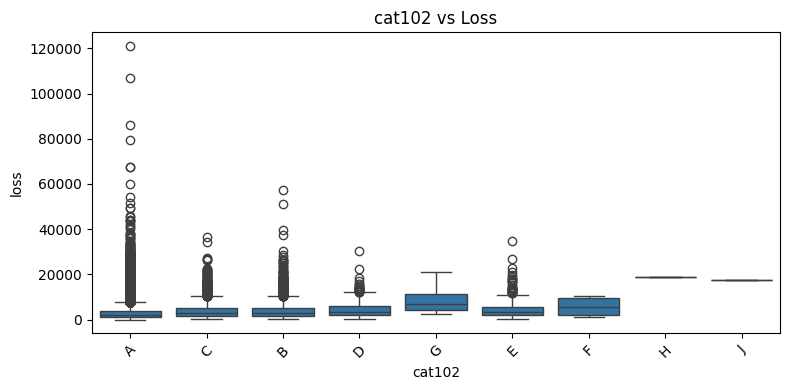

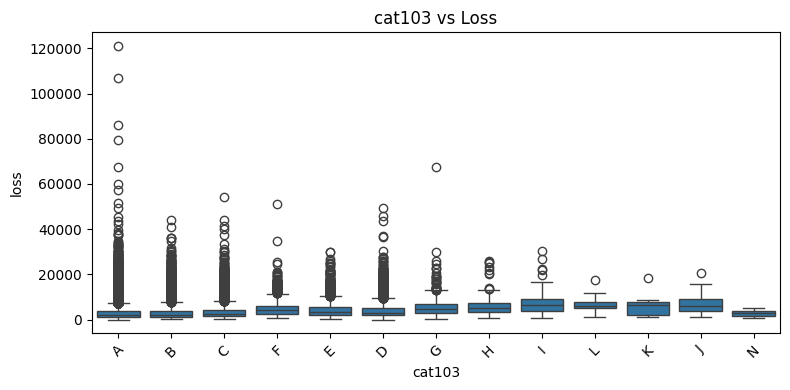

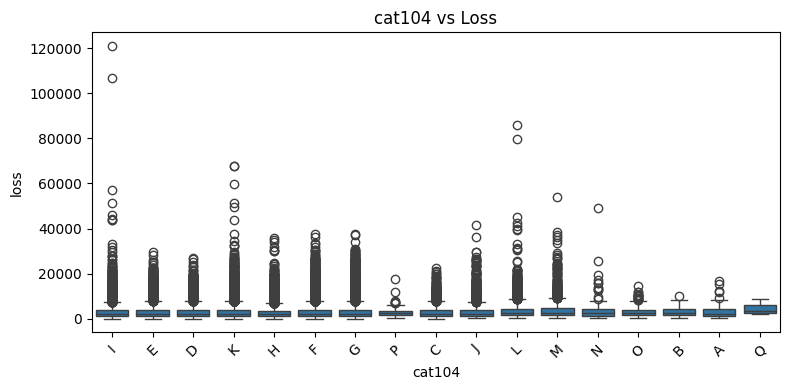

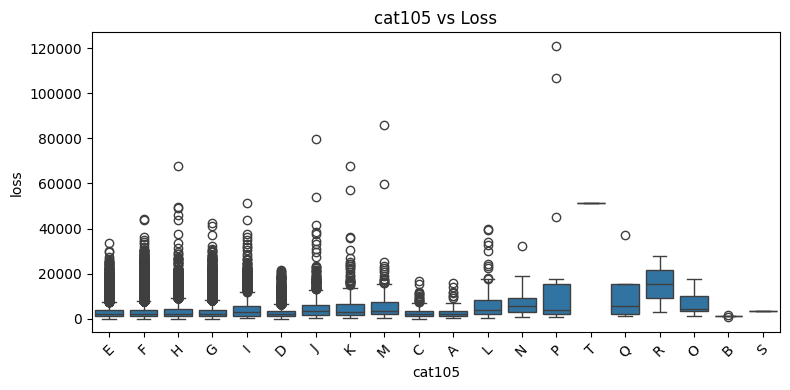

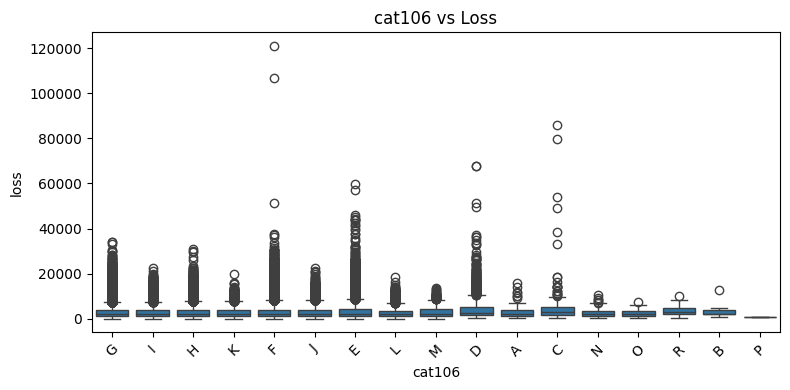

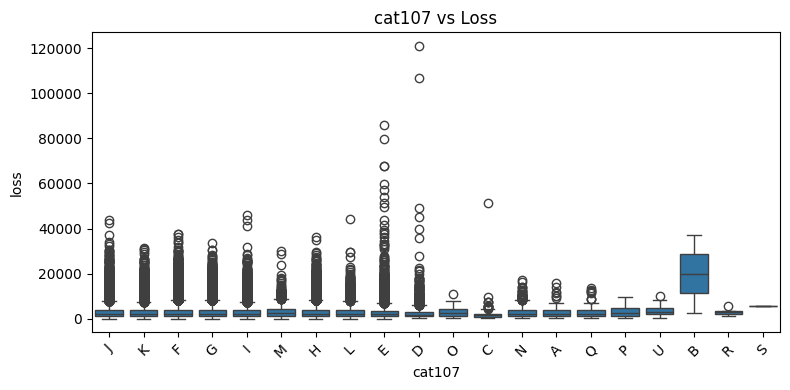

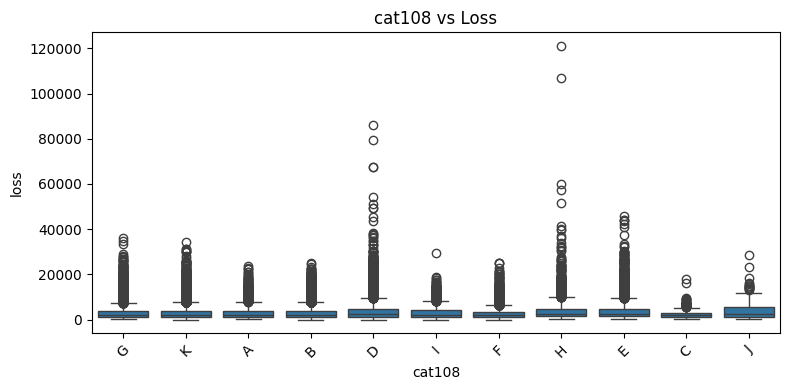

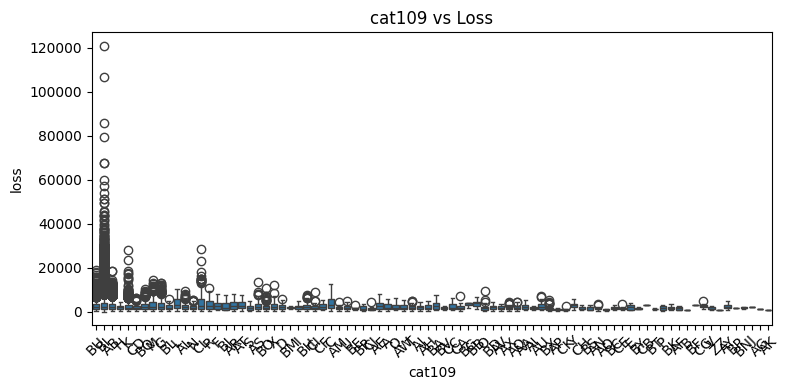

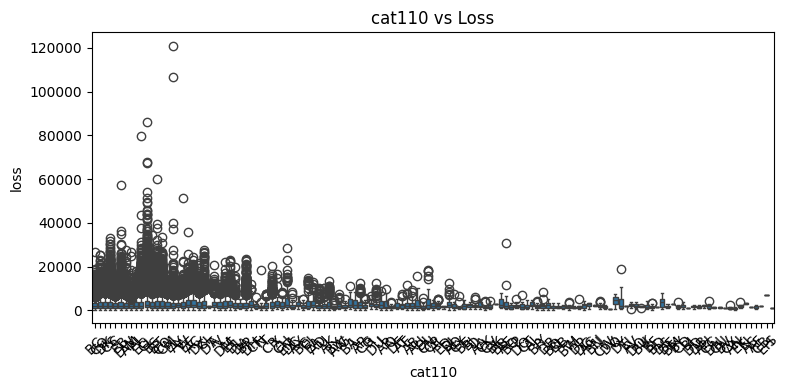

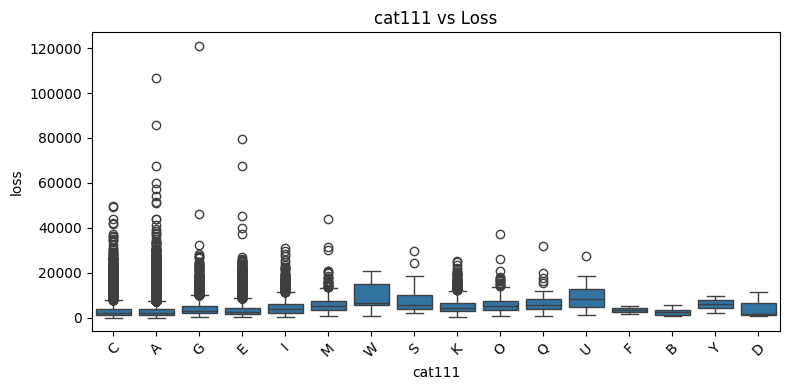

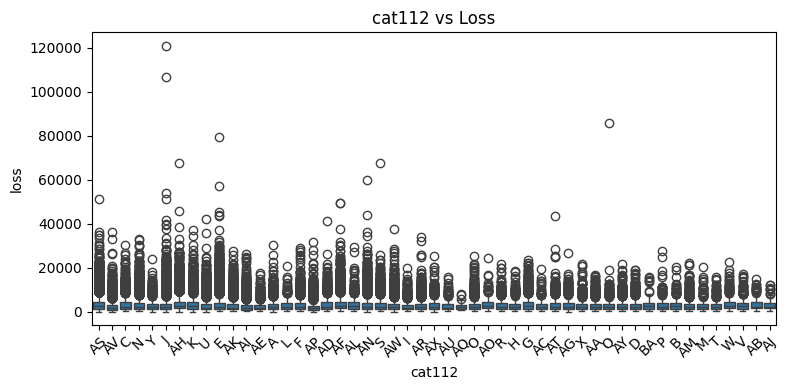

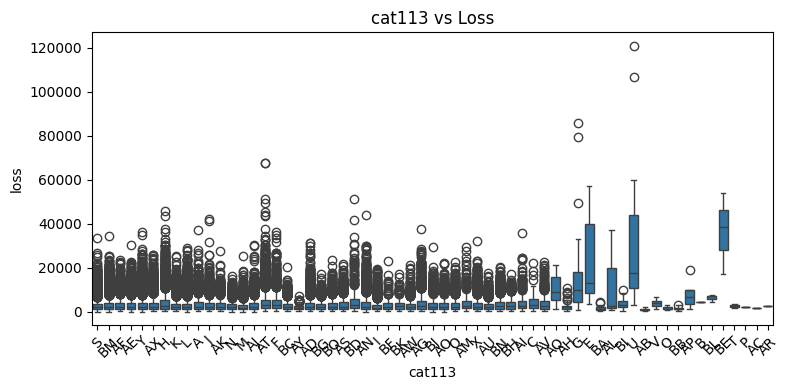

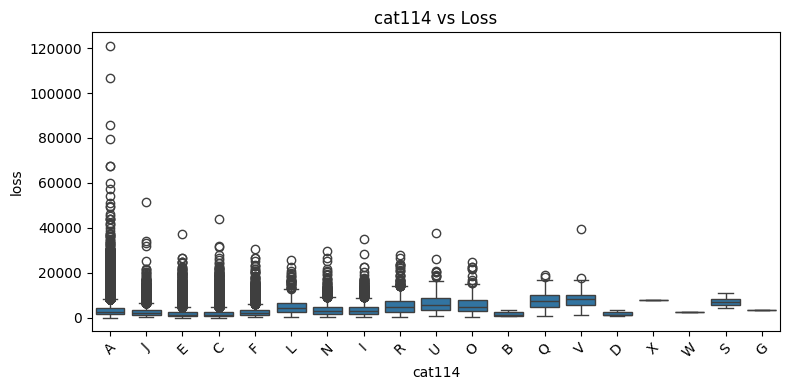

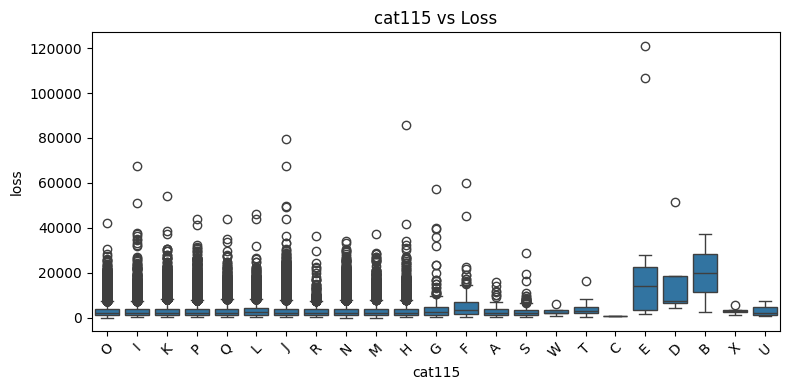

In [ ]:
# Scatterplots for numeric features vs. loss
# features (97–115)
cat_features = [f'cat{i}' for i in range(97, 115 + 1)]

# Boxplots for each categorical feature vs loss
for col in cat_features:
    plt.figure(figsize=(8, 4))
    top_cats = df[col].value_counts().nlargest(10).index  # only show top 10 categories
    sns.boxplot(x=df[col], y=df['loss'], data=df[df[col].isin(top_cats)])
    plt.title(f'{col} vs Loss')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




In [ ]:
corrs = df[num_features + ['loss']].corr()['loss'].sort_values(ascending=False)
print(corrs)


loss    1.0
Name: loss, dtype: float64
